In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseVal"] = data.target
print("First five rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())

First five rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min   

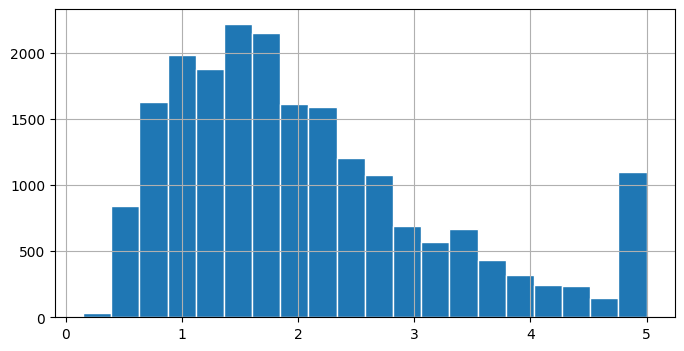

In [8]:
plt.figure(figsize = (8,4))
df["MedHouseVal"].hist(bins = 20, edgecolor = "white")
plt.show()

Text(0, 0.5, 'MedHouseVal')

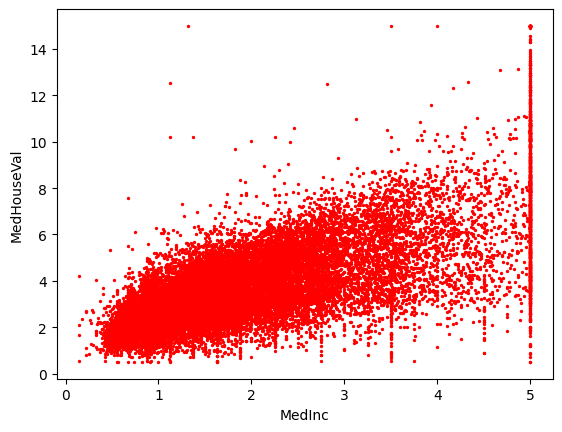

In [9]:
plt.scatter(df["MedHouseVal"],(df["MedInc"]), s = 2, color = "red")
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

Text(0, 0.5, 'MedHouseVal')

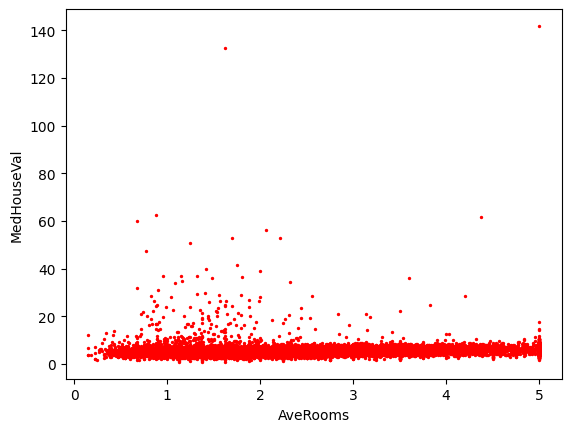

In [10]:
plt.scatter(df["MedHouseVal"],(df["AveRooms"]), s = 2, color = "red")
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')

In [12]:
x = df[["MedInc"]]
y = df["MedHouseVal"]

In [13]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xTrain, yTrain)
print(f"Slope (m) => ): {model.coef_[0]}")
print(f"Intercept (c) => : {model.intercept_}")

Slope (m) => ): 0.4193384939381271
Intercept (c) => : 0.4445972916907879


In [14]:
yPred = model.predict(xTest)
from sklearn.metrics import mean_squared_error, r2_score
meanSquaredError = mean_squared_error(yTest, yPred)
rootMeanSquaredError = np.sqrt(meanSquaredError)
rSquare = r2_score(yTest, yPred)
print(f"Mean Squared Error (MSE): {meanSquaredError}")
print(f"Root Mean Squared Error (RMSE): {rootMeanSquaredError}")
print(f"R-squared: {rSquare}")

Mean Squared Error (MSE): 0.7091157771765549
Root Mean Squared Error (RMSE): 0.8420901241414455
R-squared: 0.45885918903846656


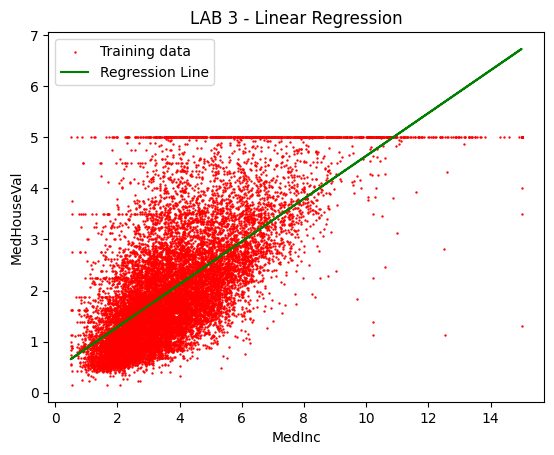

In [15]:
plt.scatter(xTrain, yTrain, label="Training data", color = "red", s = 0.5)
plt.plot(xTrain, model.predict(xTrain), color="green", label="Regression Line")
plt.title('LAB 3 - Linear Regression')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()
